demo

In [120]:
from keras.datasets import mnist
from keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from keras.utils import to_categorical
from keras import layers
from keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense

In [121]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("Unique classes in y_train:", np.unique(y_train))
print("Unique classes in y_test:", np.unique(y_test))
#we are doing this to get the number of classes in the output dataset

Unique classes in y_train: [0 1 2 3 4 5 6 7 8 9]
Unique classes in y_test: [0 1 2 3 4 5 6 7 8 9]


In [122]:
x_train.shape
#tell us there are 60k images of the given size and also tell us that the images are
#greyscale it they would have been rgb the output would be ((60000, 28, 28,3)

(60000, 28, 28)

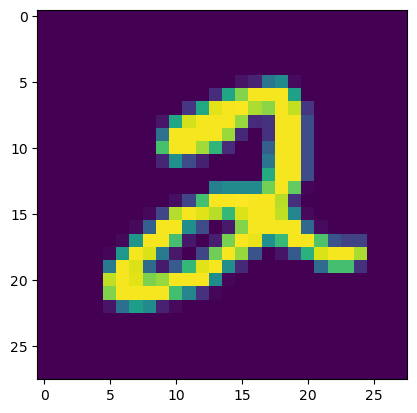

In [123]:
plt.imshow(x_train[5])
plt.show()

In [124]:
x_train=x_train.reshape((x_train.shape[0],28,28,1))
x_test=x_test.reshape((x_test.shape[0],28,28,1))
#we need this because the CNN layers require data in the format of 3D so we need to do this no need for rgb images
#60k images,28x28,greyscale

In [ ]:
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)
#sing one-hot encoding, each label is converted to a binary vector of length equal to the number of classes.
#The position of 1 in the vector indicates the class, while all other positions are 0.
#agar y integer mai hai toh 3>4 aise kuch samjh sakta woh isliye ye karne ka


In [125]:
yt=np.unique(y_test)
yt

array([0., 1.])

In [126]:
x_train=x_train/255
x_test=x_test/255
x_test
#Neural networks generally perform better when input values are in a consistent, 
#small range (like 0 to 1). When data is normalized, the model's convergence during training tends to be faster and more stable.
#this is called normalization



array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [127]:
n=np.unique(y_train)
(np.unique(y_train))
x_train.shape

(60000, 28, 28, 1)

In [128]:
model=Sequential()

In [129]:
model.add(Conv2D(32,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.2))

In [130]:
model.add(Conv2D(64,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.2))

In [131]:
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))

In [132]:
model.add(Dense(10,activation='softmax'))

In [133]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])


In [135]:
history=model.fit(x_train,y_train,batch_size=30,validation_data=(x_test,y_test),epochs=3)

Epoch 1/3
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 73s 33ms/step - accuracy: 0.8574 - loss: 0.4367 - val_accuracy: 0.9849 - val_loss: 0.0451
Epoch 2/3
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 61s 30ms/step - accuracy: 0.9721 - loss: 0.0932 - val_accuracy: 0.9882 - val_loss: 0.0367
Epoch 3/3
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 64s 32ms/step - accuracy: 0.9777 - loss: 0.0716 - val_accuracy: 0.9891 - val_loss: 0.0318


In [136]:
test_loss,test_acc=model.evaluate(x_test,y_test)
#ye 2 parameters hi return karta jo order mai pan ne likha hai


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9864 - loss: 0.0372


In [137]:
print(test_loss)

0.031797975301742554


In [143]:
print(test_acc)

0.9890999794006348


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


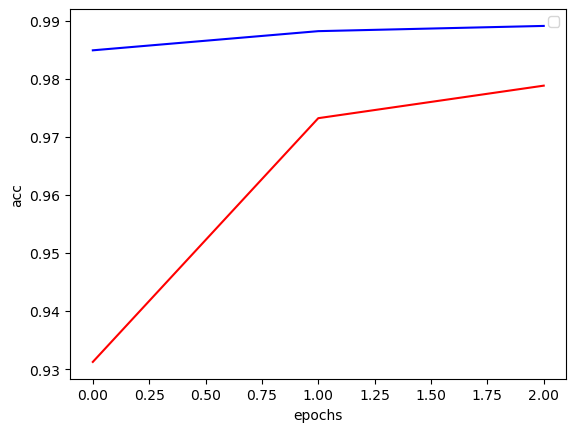

In [139]:
#graph1
plt.plot(history.history['accuracy'],color='red')
plt.plot(history.history['val_accuracy'],color='blue')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('acc')
plt.show()


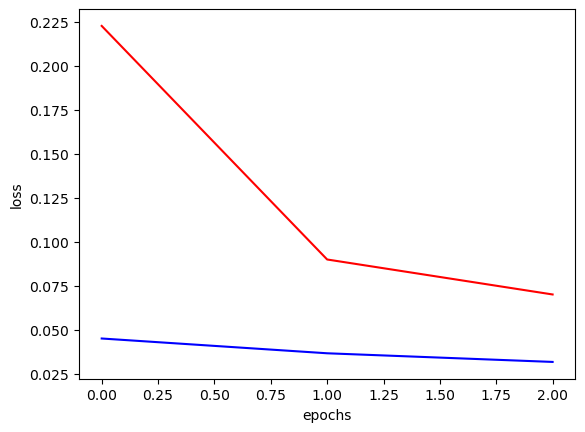

In [140]:
#Graph2
plt.plot(history.history['loss'],color='red')
plt.plot(history.history['val_loss'],color='blue')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

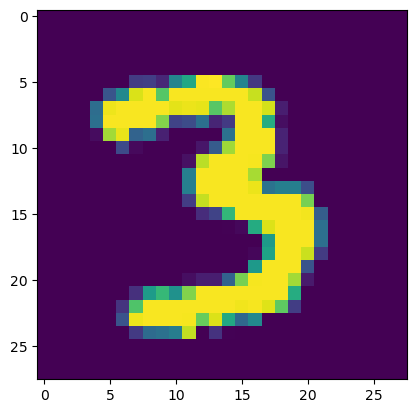

In [141]:
n=500
plt.imshow(x_test[n])
plt.show()

In [147]:
import numpy as np
predicted_values=model.predict(x_test)
print(predicted_values)
print(np.argmax(predicted_values[n]))
#yahaan pai predicted values ek baada araay of array hai toh predicted_value[n] kya krega woh
#specific array dhundega usme se max walaue ka class return karega
#[0.01, 0.03, 0.02, 0.9, 0.01, 0.01, 0.01, 0.01, 0.005, 0.01]
#agar ye array hai tho each value will correspond to a class and woh order mai hai toh agar usne 3 index pai max hai toh ye case mai woh 3 number hoga

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
[[5.93302154e-13 1.68985359e-09 1.74832469e-08 ... 9.99997735e-01
  6.40922870e-10 1.75455159e-06]
 [1.22647452e-06 9.46668308e-07 9.99996543e-01 ... 1.98157291e-09
  7.08011605e-09 9.22226878e-11]
 [2.13456772e-08 9.99956012e-01 9.85745714e-07 ... 6.85676923e-06
  2.10941357e-06 4.86653562e-07]
 ...
 [1.40024086e-11 1.10267116e-07 1.53386059e-09 ... 2.63142148e-08
  6.56044847e-07 1.16744086e-05]
 [5.05972542e-10 2.16519120e-12 1.61921989e-13 ... 4.33853058e-11
  1.18334901e-04 6.48790266e-09]
 [4.47433706e-07 6.65740574e-10 6.25235828e-07 ... 3.20713768e-11
  1.51511028e-06 4.94896213e-09]]
3
